# 1章 Python入門

## 1.5 NumPy

### 1.5.2 Numpy配列の生成

In [1]:
import numpy as np

x = np.array([1.0, 2.0, 3.0])

print(x)
type(x)

[ 1.  2.  3.]


numpy.ndarray

### 1.5.3 Numpyの算術計算

In [2]:
x = np.array([1.0, 2.0, 3.0])
y = np.array([2.0, 4.0, 6.0])

print (x + y)
print (x - y)
print (x * y)
print (x / y)

[ 3.  6.  9.]
[-1. -2. -3.]
[  2.   8.  18.]
[ 0.5  0.5  0.5]


## 1.6 Matplotlib

### 1.6.1 単純なグラフの描画

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9]


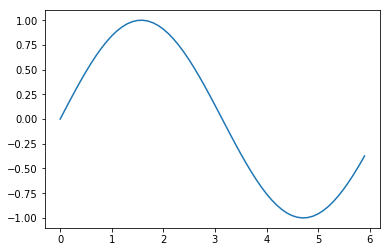

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 6, 0.1)
print(x)
y = np.sin(x)

# グラフの描画
plt.plot(x, y)
plt.show()

### 1.6.2 pyplotの機能

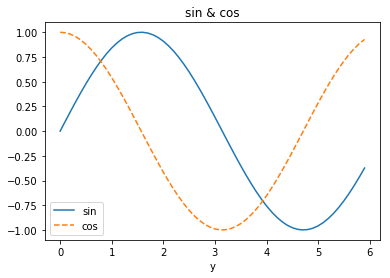

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 6, 0.1) # 0 から 6 まで 0.1 刻みで生成

y1 = np.sin(x)
y2 = np.cos(x)

# グラフの描画
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos") # 破線で描画
plt.xlabel("x")
plt.xlabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()

###  1.6.3 画像の表示

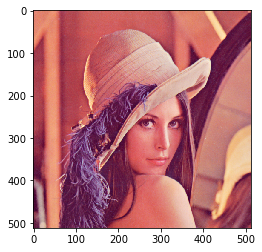

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('images/Lenna.png') # 512x512
plt.imshow(img)

plt.show()

# 2章 パーセプトロン

## 2.3 パーセプトロンの実装

### 2.3.1 簡単な実装

In [6]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print (AND(0, 0))
print (AND(1, 0))
print (AND(0, 1))
print (AND(1, 1))


0
0
0
1


### 2.3.2 重みとバイアスの導入


In [7]:
x = np.array([0, 1])       # 入力
w = np.array([0.5, 0.5])   # 重み
b = -0.7                   # バイアス

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)


[ 0.   0.5]
0.5
-0.2


### 2.3.3 重みとバイアスによる実装

In [8]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print (AND(0, 0))
print (AND(1, 0))
print (AND(0, 1))
print (AND(1, 1))


0
0
0
1


In [9]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 重みとバイアスだけがANDと違う
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print (NAND(0, 0))
print (NAND(1, 0))
print (NAND(0, 1))
print (NAND(1, 1))


1
1
1
0


In [10]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

print (OR(0, 0))
print (OR(1, 0))
print (OR(0, 1))
print (OR(1, 1))


0
1
1
1


### XORゲートの実装

In [11]:
# 多層パーセプトロン
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print (XOR(0, 0))
print (XOR(1, 0))
print (XOR(0, 1))
print (XOR(1, 1))


0
1
1
0


# 3章 ニューラルネットワーク

* 適切な重みコントロールを行うことがニューラルネットワークの重要な性質
* 入力層(第0層)→中間層(第1層)→出力層(第2層)


## 3.1.2 パーセプトロンの復習

* b 「バイアス」 ニューロンの発火のしやすさ


## 3.2.1 シグモイド関数
* ニューラルネットワークでよく用いられる活性化関数の一つ

$$ h(x) = \frac{1}{1+ exp(-x)} $$

* $ \exp(-x) は \mathrm{e}^{-x} を意味します $

* e はネイピア数で 2.7182 …の実数のことです。


## 3.2.2 ステップ関数の実装



In [37]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

* Numpy 配列に対応した実装に修正

In [38]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)